In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%pwd

'/content'

In [9]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/DL/ANN/Fruit_Classification

/content/drive/MyDrive/Colab Notebooks/DSCT/DL/ANN/Fruit_Classification


In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorflow as tf
import cv2 
import os 
import random
from collections import Counter
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Fruit Classification/train'
classes = os.listdir(train_dir)
len(classes)

28

In [11]:
X=[]
y=[]

In [12]:
for class_name in classes : 
    class_samples = os.listdir(f'{train_dir}/{class_name}')
    for sample in class_samples:
      X.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{train_dir}/{class_name}/{sample}'), cv2.COLOR_BGR2GRAY), (50, 50)))
      y.append(class_name)

In [13]:
X=np.asarray(X)
y=np.asarray(y)

In [14]:
print(X.shape , y.shape)

(14076, 50, 50) (14076,)


In [15]:
class_counts = Counter(y)
print(class_counts)

Counter({'Grape Blue': 984, 'Pear': 696, 'Apple Braeburn': 492, 'Apple Granny Smith': 492, 'Apricot': 492, 'Cantaloupe': 492, 'Cherry': 492, 'Papaya': 492, 'Peach': 492, 'Pomegranate': 492, 'Strawberry': 492, 'Banana': 490, 'Cactus fruit': 490, 'Clementine': 490, 'Limes': 490, 'Mango': 490, 'Passion Fruit': 490, 'Pineapple': 490, 'Raspberry': 490, 'Orange': 479, 'Watermelon': 475, 'Kiwi': 466, 'Blueberry': 462, 'Corn': 450, 'Potato Red': 450, 'Plum': 447, 'Avocado': 427, 'Cucumber Ripe': 392})


In [16]:
X1=X.reshape(X.shape[0],-1)
X1.shape

(14076, 2500)

In [17]:
df=[]

In [18]:
df=pd.DataFrame(X1)
df['name']=y.tolist()

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,name
0,255,255,255,255,254,254,254,255,253,253,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
1,254,254,254,254,254,253,254,254,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
2,255,255,255,255,255,255,255,255,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
3,254,254,255,254,254,254,253,255,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
4,255,255,255,255,255,255,255,255,253,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn


#EDA

In [20]:
df.value_counts('name')

name
Grape Blue            984
Pear                  696
Apple Braeburn        492
Apricot               492
Strawberry            492
Pomegranate           492
Cantaloupe            492
Cherry                492
Peach                 492
Papaya                492
Apple Granny Smith    492
Mango                 490
Raspberry             490
Pineapple             490
Passion Fruit         490
Limes                 490
Clementine            490
Cactus fruit          490
Banana                490
Orange                479
Watermelon            475
Kiwi                  466
Blueberry             462
Corn                  450
Potato Red            450
Plum                  447
Avocado               427
Cucumber Ripe         392
dtype: int64

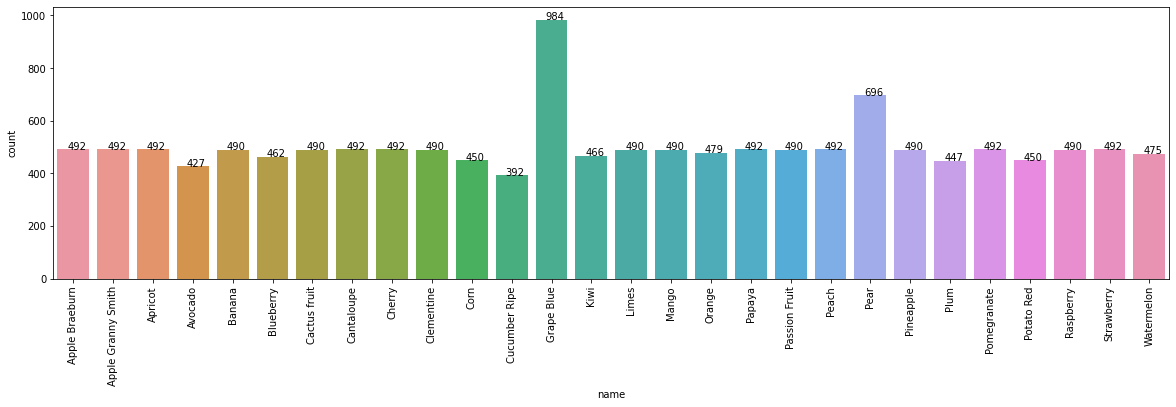

In [21]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
a=sns.countplot(x='name',data=df)
for p in a.patches:
    a.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Columns: 2501 entries, 0 to name
dtypes: object(1), uint8(2500)
memory usage: 33.7+ MB


In [23]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = plt.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

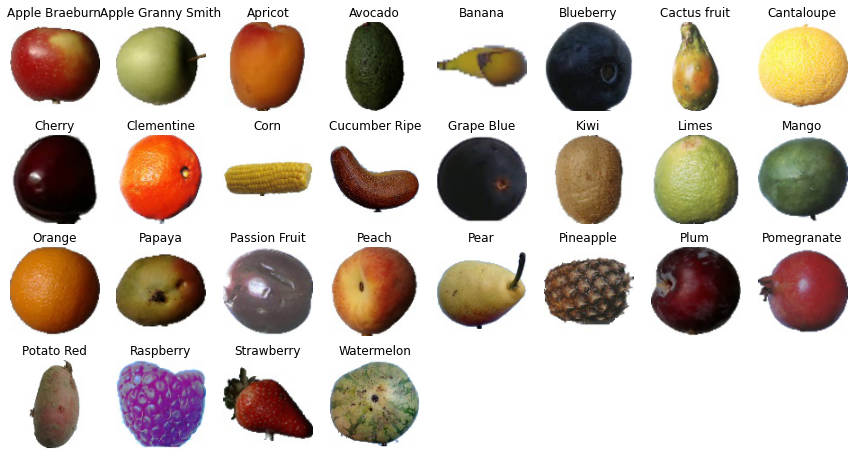

In [24]:
plt.figure(figsize = (15,10))
# View a random image from the training dataset for all classes
for i in range(len(classes)):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_dir,
                        target_class=classes[i])

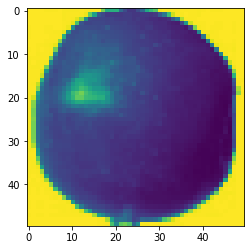

In [25]:
plt.imshow(X[0])

In [26]:
le = LabelEncoder().fit(y)
y = le.transform(y)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
a=np.unique(y)
len(a)

28

In [28]:
import joblib
joblib.dump(le,"Label_Encoder.pkl")
print("saved")

saved


In [29]:
le.inverse_transform([y[15]])

array(['Apple Braeburn'], dtype='<U18')

# Fruit Detector

In [30]:
#Train Test Split
raw_images = np.array(X1)
labels = np.array(y)
(X_train, X_test, y_train, y_test) = train_test_split(raw_images, labels, test_size=0.25, random_state=0)

In [31]:
from keras.utils import np_utils
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=28)
y_test=np_utils.to_categorical(y_test,num_classes=28)

In [32]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (10557, 2500)
X_test:- (3519, 2500)
y_train:- (10557, 28)
y_test:- (3519, 28)


In [33]:
y_train[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [34]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(20,10))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

#Step 5: Build ANN Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

# creating the Model
classifer=Sequential()

#Adding input layer
classifer.add(Dense(units=2500,activation='relu'))

#Adding h1 layer
classifer.add(Dense(units=1694,activation='relu'))
# Adding h2 layer
classifer.add(Dense(units=1694,activation='relu'))
# Adding h3 layer
classifer.add(Dense(units=1694,activation='relu'))
# Adding h4 layer
classifer.add(Dense(units=1694,activation='relu'))
# Adding h5 layer
classifer.add(Dense(units=1694,activation='relu'))

# Adding output layer
classifer.add(Dense(units=28,activation='softmax'))


# complie the model 
# Default Ir=0.001
classifer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [43]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [44]:
# train the ANN Model
model_history=classifer.fit(X_train,y_train,validation_split=0.33,batch_size=20,epochs=200,callbacks=early_stopping)

Epoch 1/200
354/354 [==============================] - 6s 9ms/step - loss: 16.6831 - accuracy: 0.4123 - val_loss: 1.0334 - val_accuracy: 0.6389
Epoch 2/200
354/354 [==============================] - 3s 9ms/step - loss: 1.0322 - accuracy: 0.6624 - val_loss: 1.0492 - val_accuracy: 0.6343
Epoch 3/200
354/354 [==============================] - 3s 9ms/step - loss: 0.7144 - accuracy: 0.7591 - val_loss: 0.7094 - val_accuracy: 0.7672
Epoch 4/200
354/354 [==============================] - 3s 8ms/step - loss: 0.6350 - accuracy: 0.7991 - val_loss: 0.6426 - val_accuracy: 0.7804
Epoch 5/200
354/354 [==============================] - 3s 9ms/step - loss: 0.6330 - accuracy: 0.7971 - val_loss: 0.6275 - val_accuracy: 0.8022
Epoch 6/200
354/354 [==============================] - 3s 10ms/step - loss: 0.5254 - accuracy: 0.8376 - val_loss: 0.4228 - val_accuracy: 0.8459
Epoch 7/200
354/354 [==============================] - 4s 12ms/step - loss: 0.4479 - accuracy: 0.8572 - val_loss: 0.4821 - val_accuracy: 0.8

In [45]:
classifer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2500)              6252500   
                                                                 
 dense_8 (Dense)             (None, 1694)              4236694   
                                                                 
 dense_9 (Dense)             (None, 1694)              2871330   
                                                                 
 dense_10 (Dense)            (None, 1694)              2871330   
                                                                 
 dense_11 (Dense)            (None, 1694)              2871330   
                                                                 
 dense_12 (Dense)            (None, 1694)              2871330   
                                                                 
 dense_13 (Dense)            (None, 28)               

In [ ]:
joblib.dump(classifer,"ANN_Model.pkl")
print("saved")

saved


In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

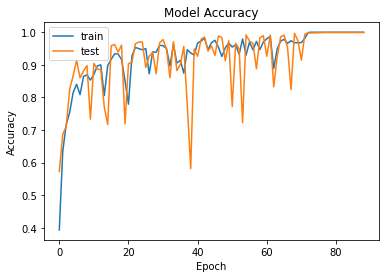

In [ ]:
# Graph Between ACC and Epoch
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()


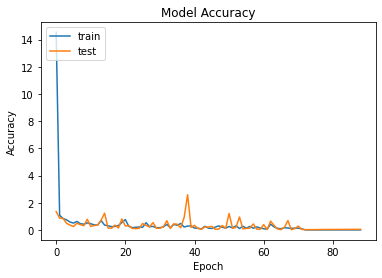

In [ ]:
# Graph Between Loss and Epoch
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred=classifer.predict(X_test)

110/110 [==============================] - 0s 2ms/step


In [ ]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [ ]:
y_pred

array([12, 22, 13, ...,  7, 12, 10])

Accuracy :- 1.0
Error rate :- 0.0
Precision:- 1.0
Recall:-  1.0
F1 score :-  1.0


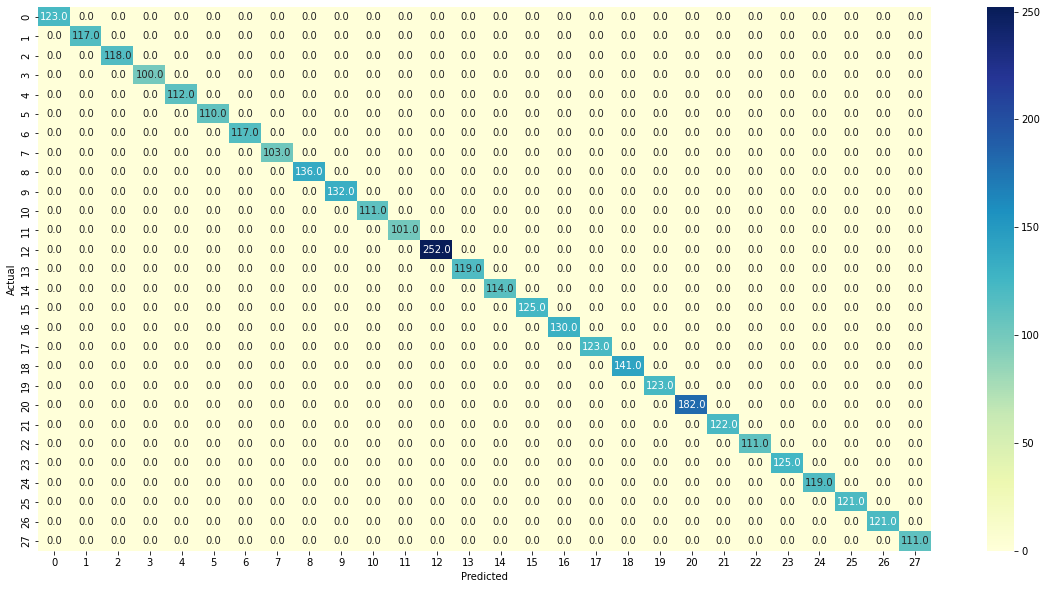

In [ ]:
model_Eval(y_test,y_pred)

# Prediction

In [ ]:
pred_dir='/content/drive/MyDrive/Colab Notebooks/Dataset/Fruit Classification/test/test/5603.jpg'


In [ ]:
X_pred=[]
X_pred.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{pred_dir}'), cv2.COLOR_BGR2GRAY), (50, 50)))

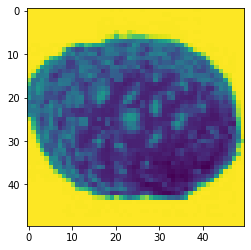

In [ ]:
plt.imshow(X_pred[0])

In [ ]:
X_pred = np.asarray(X_pred)
X_pred.shape

(1, 50, 50)

In [ ]:
X_pred = X_pred.reshape(X_pred.shape[0] , -1)
X_pred.shape

(1, 2500)

In [ ]:
ANN_Model=joblib.load("ANN_Model.pkl")
print("Loaded!!")

Loaded!!


In [ ]:
le=joblib.load("Label_Encoder.pkl")
print("Loaded!!")

Loaded!!


In [ ]:
pred=ANN_Model.predict(X_pred)[0]

1/1 [==============================] - 0s 72ms/step


In [ ]:
pred

array([1.1586243e-35, 0.0000000e+00, 2.8247672e-29, 7.0398382e-35,
       0.0000000e+00, 4.8402930e-33, 6.2992732e-24, 0.0000000e+00,
       0.0000000e+00, 2.0898385e-31, 0.0000000e+00, 3.7630610e-24,
       0.0000000e+00, 8.3382484e-23, 0.0000000e+00, 3.3804469e-34,
       0.0000000e+00, 2.8401000e-21, 0.0000000e+00, 1.9009719e-21,
       7.1391099e-29, 1.1627325e-21, 0.0000000e+00, 2.8228125e-25,
       3.7149019e-13, 1.0000000e+00, 8.0247701e-26, 3.3182370e-20],
      dtype=float32)

In [ ]:
pred=np.argmax(pred)

In [ ]:
pred

25

In [ ]:
prediction=le.inverse_transform([pred])

In [ ]:
print('Predicited image is of :-',prediction[0])

Predicited image is of :- Raspberry
